In [1]:
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from country_list import countries_for_language
model = KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin', binary=True)

In [2]:
countries = dict(countries_for_language('en'))

countries = set(countries.values())

vec = []
name = []

for c in countries:
    if c in model.vocab:
        vec.append(model[c])
        name.append(c)

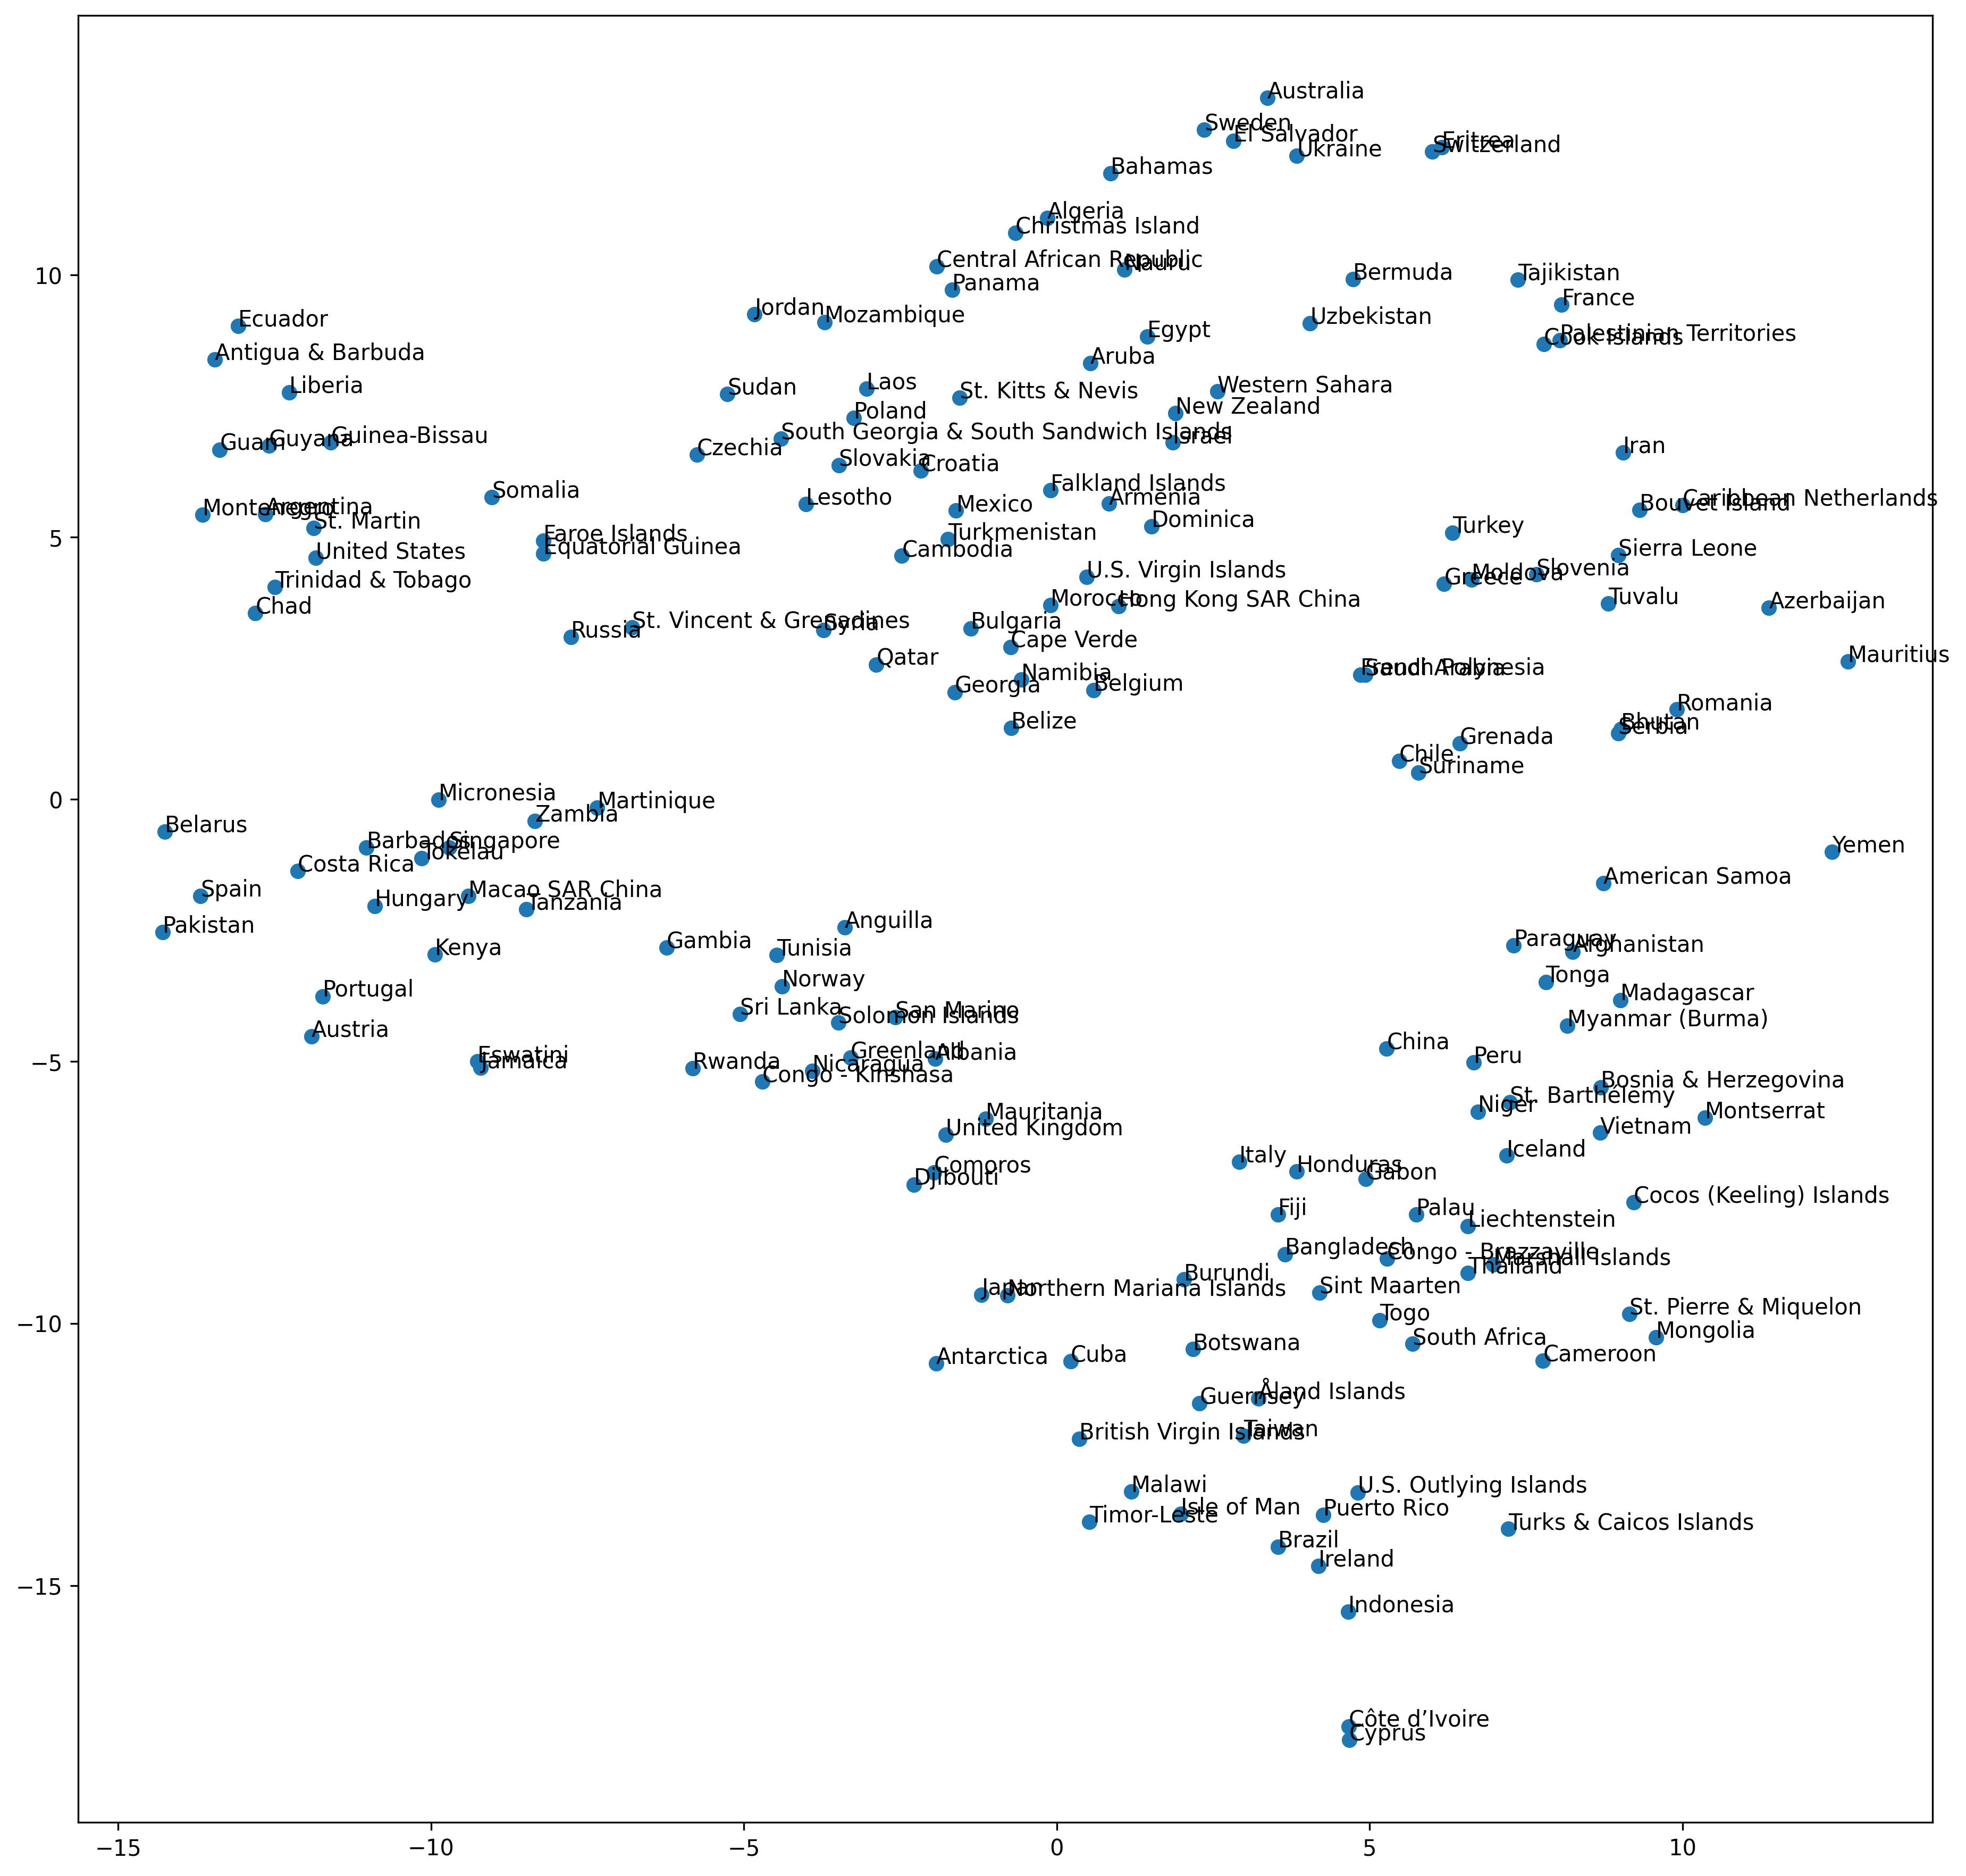

In [5]:
X = np.array(vec)
tsne = TSNE(random_state=0, n_iter=15000, metric='cosine')
embs = tsne.fit_transform(X)
plt.figure(figsize=(15, 15), dpi=300)
plt.scatter(embs[:, 0], embs[:, 1])
for (x, y), name in zip(embs, countries):
    plt.annotate(name, (x, y))
plt.show()